このコードは、Google Colab で Google ドライブ内の CSV ファイルを読み込むためのものです。以下、コードの詳細な解説をします。

---

### 1. **Google ドライブをマウント**
```python
from google.colab import drive
drive.mount('/content/drive')
```
- `from google.colab import drive`: Google Colab で Google ドライブを操作するための `drive` モジュールをインポートします。
- `drive.mount('/content/drive')`: Google ドライブを `/content/drive` にマウントし、Colab からアクセスできるようにします。
  - 初回実行時には、Google アカウントでの認証を求められます。

---

### 2. **ディレクトリのパスを指定**
```python
import os
directory = '/content/drive/My Drive/day6'
```
- `import os`: OS関連の操作（パス結合など）を行うための `os` モジュールをインポートします。
- `directory = '/content/drive/My Drive/day6'`:  
  - Google ドライブの `My Drive/day6` フォルダ内のデータを扱うためのディレクトリパスを変数 `directory` に格納します。

---

### 3. **CSVファイルをデータフレームとして読み込む**
```python
import pandas as pd

descriptor_df = pd.read_csv(os.path.join(directory, 'descriptor_df.csv'))
property_df = pd.read_csv(os.path.join(directory, 'property_df.csv'))
```
- `import pandas as pd`: データ解析ライブラリ `pandas` をインポートします。
- `pd.read_csv(os.path.join(directory, 'descriptor_df.csv'))`:  
  - `os.path.join(directory, 'descriptor_df.csv')` により、CSVファイルのフルパスを作成します。
  - `pd.read_csv(...)` を使って、CSVファイル `descriptor_df.csv` をデータフレーム `descriptor_df` に読み込みます。
- `pd.read_csv(os.path.join(directory, 'property_df.csv'))`:  
  - `property_df.csv` も同様に読み込み、データフレーム `property_df` に格納します。

---

### 4. **このコードの目的**
- Google ドライブをマウントし、Colab から特定のフォルダ (`day6`) 内の CSVファイルを読み込み、データ分析の準備を行う。

---

### 5. **補足: エラー対策**
1. **マウントに失敗する場合**
   - `drive.mount('/content/drive')` を実行した際に `Permission denied` などのエラーが出る場合は、認証プロセスをやり直してください。

2. **ファイルが見つからない場合**
   - `FileNotFoundError: [Errno 2] No such file or directory` が出る場合:
     - `directory` のパスが正しいか確認 (`My Drive` のスペースを間違えていないか)。
     - `day6` フォルダ内に `descriptor_df.csv` や `property_df.csv` があるか確認。

3. **Google ドライブのパスの書き方**
   - `'/content/drive/My Drive/day6'` のように書く場合、`My Drive` の部分に注意してください。
   - Colab の `Files` タブで `day6` フォルダのパスを確認すると確実です。

---

### 6. **実行後のデータフレームの活用**
- `descriptor_df.head()` や `property_df.info()` でデータを確認できます。
- その後のデータ分析や機械学習に活用可能です。

---

このコードは、Google Colab 上でデータ分析を行う際の基本的なデータ読み込み手順となります。

In [ ]:
from google.colab import drive
import pandas as pd
import os

# Google ドライブをマウント
drive.mount('/content/drive')

# ディレクトリのパス
directory = '/content/drive/My Drive/day6'

# CSVファイルからデータフレームを読み込み
descriptor_df = pd.read_csv(os.path.join(directory, 'descriptor_df.csv'))
property_df = pd.read_csv(os.path.join(directory, 'property_df.csv'))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


このコードは、機械学習モデルを構築するためにデータセットを分割する処理を行っています。以下、詳細に解説します。

---

## **1. 必要なライブラリのインポート**
```python
from sklearn.model_selection import train_test_split
```
- `train_test_split` は、データセットを **トレーニングデータ (train set)** と **検証データ (validation set)** に分割するための関数です。
- `sklearn.model_selection` は、機械学習のデータ準備のためのモジュールです。

---

## **2. 1000個の化合物をランダムに選択**
```python
known_data = property_df.sample(n=1000, random_state=42)
```
- `property_df` から **1000個の化合物データをランダムにサンプリング** しています。
- `random_state=42` を指定することで、毎回同じランダムサンプルが選ばれます（再現性を確保）。

---

## **3. サンプリングしたデータを学習用と検証用に分割**
```python
train_data, valid_data = train_test_split(known_data, test_size=0.2, random_state=42)
```
- `train_test_split()` を使用し、`known_data` を **トレーニングデータ (80%)** と **検証データ (20%)** に分割します。
  - `test_size=0.2` → 全体の **20% (200個)** を検証データ (`valid_data`) にする。
  - 残りの **80% (800個)** がトレーニングデータ (`train_data`)。
  - `random_state=42` により、毎回同じ分割結果になります。

---

## **4. 未知のデータ（テストデータ）を設定**
```python
test_data = property_df.drop(known_data.index)
```
- `property_df` から `known_data` に含まれる **1000個の化合物を除外** したデータを `test_data` として保存。
- これは、**HOMO-LUMO gap（分子軌道エネルギー差）が未知のデータセット** を作る意図と考えられます。
  - `HOMO-LUMO gap` は、分子の電子構造に関する重要な物理化学的特性の1つ。
  - ここでは `test_data` に含まれる化合物の `HOMO-LUMO gap` が未知である（= 機械学習モデルで予測する対象）という設定。

---

## **5. まとめ**
### **このコードの目的**
- `property_df` の中から **1000個の化合物をランダムに選択**（`known_data`）。
- その 1000個のデータを **トレーニング (80%) / 検証 (20%) に分割**。
- 残りのデータを **テストデータ（未知データ）** として保持。

### **データのイメージ**
| データセット | データ数 | 説明 |
|------------|---------|------|
| `train_data` | 800 | モデルの学習用 |
| `valid_data` | 200 | モデルの評価用 |
| `test_data` | `property_df` の中から 1000個を除外した残り | 最終的なモデルの性能を検証するためのデータ |

このようにデータを分割することで、**過学習を防ぎつつ、モデルの汎化性能を適切に評価する** ことができます。

---

## **補足**
### **もし `test_data` が不要な場合**
テストデータを別途用意していない場合、**モデルの最終評価には `valid_data` を使うことも可能** です。

### **データ数を変更するには？**
- `sample(n=1000, random_state=42)` の `n=1000` を変更すれば、サンプリング数を変えられます。
- `train_test_split(..., test_size=0.2, random_state=42)` の `test_size` を変えると、学習データと検証データの比率を変更できます。

このコードは、化学分野における**機械学習モデルの学習・評価のためのデータ準備**を行う基本的な手順となっています。

In [ ]:
from sklearn.model_selection import train_test_split

# 1000化合物をランダムに選ぶ
known_data = property_df.sample(n=1000, random_state=42)

# Selected dataをトレーニングデータと検証データにさらに分割
train_data, valid_data = train_test_split(known_data, test_size=0.2, random_state=42)

# Test dataを設定（HOMO-LUMO gap未知）
test_data = property_df.drop(known_data.index)

このコードは、PyTorchを使って分子の **HOMO-LUMO gap** を予測する回帰モデルを学習・評価するためのものです。コードをステップごとに解説します。

---

### **1. 必要なライブラリのインポート**
```python
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader, Dataset
from torch.optim import Adam
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
```
- `torch`: PyTorchライブラリ。深層学習モデルの作成、学習、評価に使用します。
- `nn`: ニューラルネットワーク（`nn.Module`）を作成するためのモジュール。
- `functional as F`: ニューラルネットワークの活性化関数や損失関数などを含むモジュール。
- `DataLoader`, `Dataset`: データセットを扱うためのクラス。`DataLoader` はデータをバッチ処理で読み込むために使います。
- `Adam`: 最適化アルゴリズム。
- `r2_score`: 回帰モデルの評価指標である決定係数 (R²) を計算する関数。
- `matplotlib.pyplot`: 学習曲線をプロットするためのライブラリ。

---

### **2. データセットクラスの定義**
```python
class MoleculeDataset(Dataset):
    def __init__(self, df, property_df):
        self.descriptors = torch.tensor(df.values, dtype=torch.float32)
        self.properties = torch.tensor(property_df['HOMO-LUMO gap'].values, dtype=torch.float32)

    def __len__(self):
        return len(self.descriptors)

    def __getitem__(self, idx):
        return self.descriptors[idx], self.properties[idx]
```
- `MoleculeDataset` は、PyTorch の `Dataset` クラスを継承して、新たにデータセットを定義しています。
  - `__init__`: コンストラクタ。入力データ (`df`) とターゲット値（`property_df['HOMO-LUMO gap']`）をPyTorchのテンソルに変換しています。
  - `__len__`: データセットのサイズを返します（データの個数）。
  - `__getitem__`: インデックス `idx` に対応する入力（特徴量）とターゲット（HOMO-LUMO gap）を返します。

---

### **3. DataLoaderの定義**
```python
batch_size = 32
train_dataset = MoleculeDataset(descriptor_df.loc[train_data.index], train_data)
valid_dataset = MoleculeDataset(descriptor_df.loc[valid_data.index], valid_data)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(dataset=valid_dataset, batch_size=batch_size)
```
- `batch_size=32`: ミニバッチのサイズを32に設定しています。
- `train_dataset` と `valid_dataset` は、それぞれトレーニングと検証用のデータセットです。
- `DataLoader`: バッチ処理を行い、データをランダムにシャッフルして読み込むためのクラスです。

---

### **4. ニューラルネットワークモデルの定義**
```python
class Regressor(nn.Module):
    def __init__(self):
        super(Regressor, self).__init__()
        self.fc1 = nn.Linear(descriptor_df.shape[1], 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x
```
- `Regressor` クラスは、PyTorchの `nn.Module` を継承し、ニューラルネットワークの構造を定義します。
  - `__init__`:
    - 4層の全結合層（`nn.Linear`）を定義。
    - 各層のノード数を順に設定（入力層 → 512 → 256 → 128 → 出力層）。
  - `forward`: 順伝播（入力データがどのように処理されるか）を定義。各層の後に ReLU 活性化関数（`F.relu`）を適用。

---

### **5. モデルのインスタンス化、損失関数、最適化アルゴリズムの定義**
```python
model = Regressor()
criterion = nn.MSELoss()
optimizer = Adam(model.parameters(), lr=0.001)
```
- `model`: 定義したニューラルネットワークモデルをインスタンス化。
- `criterion`: 損失関数は平均二乗誤差（`MSELoss`）を使用。回帰問題においてよく使われる損失関数です。
- `optimizer`: Adam最適化アルゴリズムを使用。学習率（`lr=0.001`）を設定。

---

### **6. 学習と検証のための関数**
```python
def train(model, loader):
    model.train()
    running_loss = 0
    for inputs, targets in loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets.view(-1, 1))
        running_loss += loss.item()
        loss.backward()
        optimizer.step()
    return running_loss / len(loader)

def validate(model, loader):
    model.eval()
    running_loss = 0
    with torch.no_grad():
        for inputs, targets in loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets.view(-1, 1))
            running_loss += loss.item()
    return running_loss / len(loader)
```
- `train`: モデルをトレーニングモードに設定し、ミニバッチごとに勾配を計算し、最適化ステップを実行します。
- `validate`: モデルを評価モードに設定し、検証データに対して損失を計算します（`torch.no_grad()` は勾配計算を無効にします）。

---

### **7. 学習の実行と損失の記録**
```python
train_losses = []
valid_losses = []
for epoch in range(100):
    train_loss = train(model, train_loader)
    valid_loss = validate(model, valid_loader)
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    print(f"Epoch:{epoch+1}, Train Loss:{train_loss}, Validation Loss:{valid_loss}")
```
- 100エポック（反復）にわたってモデルをトレーニングし、トレーニング損失と検証損失をそれぞれ記録します。

---

### **8. 学習曲線の表示**
```python
plt.plot(train_losses, label='Training loss')
plt.plot(valid_losses, label='Validation loss')
plt.legend(frameon=False)
plt.show()
```
- トレーニング損失と検証損失の推移をグラフにプロットし、学習曲線を可視化します。

---

### **9. 予測とR²スコアの計算**
```python
y_train_true = train_data['HOMO-LUMO gap'].values
y_valid_true = valid_data['HOMO-LUMO gap'].values
y_test_true = test_data['HOMO-LUMO gap'].values

y_train_pred = model(torch.tensor(descriptor_df.loc[train_data.index].values, dtype=torch.float32)).detach().numpy()
y_valid_pred = model(torch.tensor(descriptor_df.loc[valid_data.index].values, dtype=torch.float32)).detach().numpy()
y_test_pred = model(torch.tensor(descriptor_df.loc[test_data.index].values, dtype=torch.float32)).detach().numpy()

print("Train R^2 Score:", r2_score(y_train_true, y_train_pred))
print("Valid R^2 Score:", r2_score(y_valid_true, y_valid_pred))
print("Test R^2 Score:", r2_score(y_test_true, y_test_pred))
```
- トレーニング、検証、テストデータセットに対して予測を行い、**R²スコア** を計算してモデルの性能を評価します。

---

### **まとめ**
このコードは、HOMO-LUMO gapの予測という回帰問題を解くための深層学習モデルの構築と学習を行っています。データセットをトレーニング、検証、テストに分割し、PyTorchを使ってモデルの学習を行い、最終的にR²スコアで性能を評価します。

Epoch:1, Train Loss:10.94865514755249, Validation Loss:2.8853553192956105
Epoch:2, Train Loss:1.4172235417366028, Validation Loss:0.9401395235742841
Epoch:3, Train Loss:0.4564365458488464, Validation Loss:0.544395238161087
Epoch:4, Train Loss:0.26023937702178956, Validation Loss:0.42616237487111774
Epoch:5, Train Loss:0.1744734090566635, Validation Loss:0.40414982714823317
Epoch:6, Train Loss:0.14619384944438935, Validation Loss:0.4104194257940565
Epoch:7, Train Loss:0.11279654592275619, Validation Loss:0.3923553228378296
Epoch:8, Train Loss:0.0955464068055153, Validation Loss:0.4208758920431137
Epoch:9, Train Loss:0.0788812580704689, Validation Loss:0.4105734037501471
Epoch:10, Train Loss:0.06914448946714401, Validation Loss:0.40103362926415037
Epoch:11, Train Loss:0.06108231574296951, Validation Loss:0.3836823936019625
Epoch:12, Train Loss:0.05884560376405716, Validation Loss:0.41097840666770935
Epoch:13, Train Loss:0.047464628145098685, Validation Loss:0.41442394256591797
Epoch:14, 

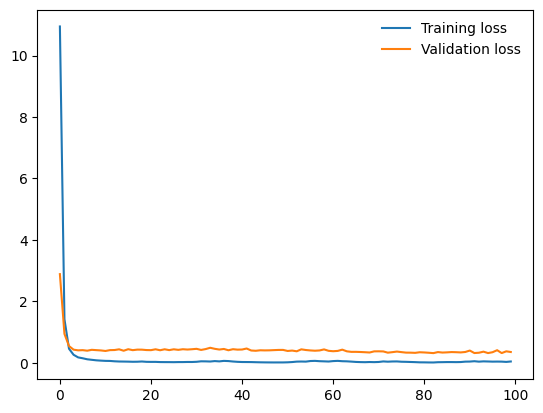

Train R^2 Score: 0.9707378323992526
Valid R^2 Score: 0.8631872433323878
Test R^2 Score: 0.83213987162006


In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader, Dataset
from torch.optim import Adam
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Dataset classの定義
class MoleculeDataset(Dataset):
    def __init__(self, df, property_df):
        self.descriptors = torch.tensor(df.values, dtype=torch.float32)
        self.properties = torch.tensor(property_df['HOMO-LUMO gap'].values, dtype=torch.float32)

    def __len__(self):
        return len(self.descriptors)

    def __getitem__(self, idx):
        return self.descriptors[idx], self.properties[idx]

# DataLoaderの定義
batch_size = 32
train_dataset = MoleculeDataset(descriptor_df.loc[train_data.index], train_data)
valid_dataset = MoleculeDataset(descriptor_df.loc[valid_data.index], valid_data)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(dataset=valid_dataset, batch_size=batch_size)

# Modelの定義
class Regressor(nn.Module):
    def __init__(self):
        super(Regressor, self).__init__()
        self.fc1 = nn.Linear(descriptor_df.shape[1], 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

model = Regressor()
criterion = nn.MSELoss()
optimizer = Adam(model.parameters(), lr=0.001)

# Train function
def train(model, loader):
    model.train()
    running_loss = 0
    for inputs, targets in loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets.view(-1, 1))
        running_loss += loss.item()
        loss.backward()
        optimizer.step()
    return running_loss / len(loader)

# Validate function
def validate(model, loader):
    model.eval()
    running_loss = 0
    with torch.no_grad():
        for inputs, targets in loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets.view(-1, 1))
            running_loss += loss.item()
    return running_loss / len(loader)

# モデルの学習と評価
train_losses = []
valid_losses = []
for epoch in range(100):
    train_loss = train(model, train_loader)
    valid_loss = validate(model, valid_loader)
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    print(f"Epoch:{epoch+1}, Train Loss:{train_loss}, Validation Loss:{valid_loss}")

# 学習曲線の表示
plt.plot(train_losses, label='Training loss')
plt.plot(valid_losses, label='Validation loss')
plt.legend(frameon=False)
plt.show()

# 予測と評価
y_train_true = train_data['HOMO-LUMO gap'].values
y_valid_true = valid_data['HOMO-LUMO gap'].values
y_test_true = test_data['HOMO-LUMO gap'].values

y_train_pred = model(torch.tensor(descriptor_df.loc[train_data.index].values, dtype=torch.float32)).detach().numpy()
y_valid_pred = model(torch.tensor(descriptor_df.loc[valid_data.index].values, dtype=torch.float32)).detach().numpy()
y_test_pred = model(torch.tensor(descriptor_df.loc[test_data.index].values, dtype=torch.float32)).detach().numpy()

print("Train R^2 Score:", r2_score(y_train_true, y_train_pred))
print("Valid R^2 Score:", r2_score(y_valid_true, y_valid_pred))
print("Test R^2 Score:", r2_score(y_test_true, y_test_pred))

これまでのコードは、分子の **HOMO-LUMO gap** を予測するための回帰モデルの学習と評価を行うものです。PyTorchを使用して、ニューラルネットワークモデルを構築し、データの前処理から評価までの一連の流れを実行しています。以下に、コードの主なステップをまとめます。

---

### **1. データセットの準備**
- **`MoleculeDataset` クラス**: `torch.utils.data.Dataset` を継承して、特徴量（`descriptor_df`）とターゲット（`property_df['HOMO-LUMO gap']`）を PyTorch のテンソルとしてラップしたカスタムデータセットを作成。
- **`DataLoader`**: 学習データと検証データをバッチ処理でロードするための `DataLoader` を作成。バッチサイズは32に設定し、データをランダムにシャッフル。

---

### **2. ニューラルネットワークモデルの構築**
- **`Regressor` クラス**: 4層の全結合（`Linear`）ニューラルネットワークを定義。
  - **層構成**:
    - 入力層 → 512ユニット
    - 隠れ層1 → 256ユニット
    - 隠れ層2 → 128ユニット
    - 出力層 → 1ユニット（HOMO-LUMO gapの予測）
  - **活性化関数**: 各層の後にReLU関数（`F.relu`）を適用。

---

### **3. モデルの学習**
- **最適化手法**: `Adam` オプティマイザー、学習率は 0.001 に設定。
- **損失関数**: 平均二乗誤差（MSELoss）を使用して、予測値と実際のターゲットとの誤差を計算。
- **学習関数**:
  - `train` 関数: トレーニングデータを用いてモデルを訓練。ミニバッチごとに誤差を計算し、逆伝播を行って最適化。
  - `validate` 関数: 検証データを用いてモデルの性能を評価（勾配計算を無効にして損失を計算）。

---

### **4. 学習と検証の実行**
- 100エポックにわたり、トレーニングと検証を行い、各エポックのトレーニング損失と検証損失を記録。
- 損失の推移をグラフにプロットして、学習曲線を可視化。

---

### **5. モデルの評価**
- 学習が終了した後、トレーニング、検証、およびテストデータに対して予測を実行。
- 各データセットに対して **R²スコア**（決定係数）を計算し、モデルの性能を評価。

---

### **6. 使用するライブラリ**
- **PyTorch** (`torch`): ニューラルネットワークの構築、トレーニング、評価に使用。
- **Scikit-learn**: `r2_score` を使用して回帰モデルの評価を行う。
- **Matplotlib**: 学習過程を視覚化するために学習曲線をプロット。

---

### **全体の流れ**
1. データを読み込み、特徴量とターゲットをPyTorchのテンソルに変換。
2. カスタムデータセット (`MoleculeDataset`) と `DataLoader` を作成し、トレーニングおよび検証データを準備。
3. ニューラルネットワーク（`Regressor`）を定義し、トレーニングデータを使ってモデルを学習。
4. 検証データを使ってモデルの性能を確認し、学習過程を可視化。
5. 最後にテストデータを使って予測を行い、R²スコアで評価。

---

### **まとめ**
このコードは、分子の特性である **HOMO-LUMO gap** を予測するための回帰モデルを構築するための一連の処理を行っています。PyTorchを用いてニューラルネットワークを訓練し、評価することで、与えられた特徴量からHOMO-LUMO gapを高精度で予測することを目的としています。